In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set default style and enable show

In [6]:
%matplotlib inline
sns.set_style(style='whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

Import Titanic data

In [7]:
tdf = pd.read_csv('titanic_train.csv')

In [8]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Probability of survival is dependent on the class that people belonging to class 1 are more likely to survive than belong to class 3

Majority of the Fare lies between 0 to 50

Sex has an impact on the survival , Females are more likely to survive than male

Most of the passengers are single. nearly one-fifth of them have a spouse or sibling on board

People with 1 or 2 onboard as spouse/siblings have more chance of survival than passengers who are single

Analyze the columns to decide on preprocessing 

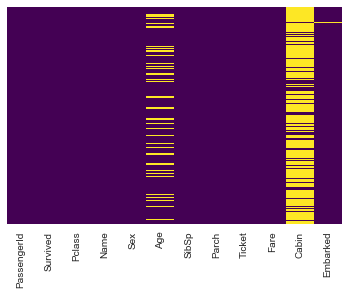

In [9]:
sns.heatmap(tdf.isnull(),annot=False, yticklabels=False,cbar=False,cmap='viridis')

We find missing data in Age, Cabin and Embarked. Embarked has only one missing data. 

Let us analyse the age and identify on how to fill the missing data in it. 
There are many ways to do it. 
 - Populating mean/average for all the missing data
 - Relate age to some other column find a relation and update based on the relation. 

let's take the second approach

We find that average age for class 1 is 37, class 2 is 28  and class 3 is 24. So we shall update the age with their mean based on their class

In [10]:
def determine_age(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        if(pclass == 1):
            return 37
        elif(pclass==2):
            return 29
        else:
            return 24
    else:
        return age
    
determine_age([np.nan,1])

37

In [11]:
tdf['Age'] = tdf[['Age','Pclass']].apply(determine_age,axis=1)

In [12]:
tdf.drop(labels=['Name','Ticket','Cabin'], axis =1, inplace=True)

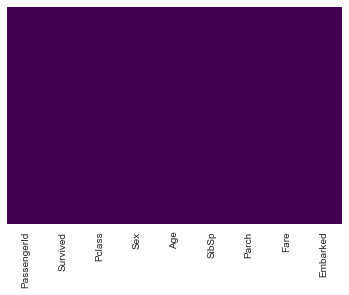

In [20]:
sns.heatmap(tdf.isnull(),annot=False, yticklabels=False,cbar=False,cmap='viridis')

In [19]:
tdf.dropna(inplace=True)

In [21]:
Embark = pd.get_dummies(tdf['Embarked'],drop_first=True)
Sex = pd.get_dummies(tdf['Sex'],drop_first=True)
#Pclass = pd.get_dummies(tdf['Pclass'],drop_first=True)

In [22]:
tdf.drop(labels=['Embarked','Sex'], axis =1, inplace=True)

In [37]:
tdf.drop(labels=['PassengerId'], axis =1, inplace=True)

In [23]:
tdf = pd.concat([tdf,Sex,Embark],axis=1)

In [38]:
tdf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [39]:
X = tdf[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y = tdf['Survived']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.30, 
                                                    random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()

In [42]:
lrm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
lrm.coef_

array([[  4.07955382e-04,  -7.86365405e-01,  -2.63396134e-02,
         -2.12110745e-01,  -9.70466787e-02,   4.63350974e-03,
         -2.34157562e+00,  -1.74595104e-02,  -1.93376424e-01]])

In [43]:
lrm.coef_

array([[-0.78652886, -0.02593247, -0.21667228, -0.08545763,  0.00467323,
        -2.32207979, -0.01373715, -0.16948954]])

In [44]:
predicted  = lrm.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
print(confusion_matrix(y_test,predicted))

[[148  15]
 [ 36  68]]


In [47]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267

